In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 한글 깨짐 방지
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
# 경로지정 변경확인 필요
df = pd.read_csv(r'C:\Users\김성민\pow-gongmo\data\final\final_animal_visit_travel_검색건수.csv', encoding ='cp949')

In [4]:
# 데이터확인
df.head()

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12,기타관광_검색건수,문화관광_검색건수,숙박_검색건수,역사관광_검색건수,음식_검색건수,자연관광_검색건수,체험관광_검색건수
0,가평군,22105529,13,11,223,35,37,4.17,3.95,3.99,157771,234906,1311127,17744,1226985,361855,1289
1,강남구,103309405,2,11,3,10,36,4.10,4.13,3.98,274883,1649245,1664707,127637,5789966,0,464
2,강동구,23706460,2,6,1,2,18,3.60,3.92,3.96,2841,191445,76353,28654,829629,0,559
3,강릉시,26260986,8,11,70,33,33,4.27,4.13,3.75,147345,600572,1401723,196020,2912455,1026485,46494
4,강북구,18328235,1,5,1,6,19,4.50,4.00,3.89,14735,88315,115210,124365,415549,5433,24


In [5]:
# 데이터의 shape 파악
# 229행 17열
df.shape

(229, 17)

In [6]:
# 기초통계량 확인
df.describe()

,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12,기타관광_검색건수,문화관광_검색건수,숙박_검색건수,역사관광_검색건수,음식_검색건수,자연관광_검색건수,체험관광_검색건수
count,2.290000e+02,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,229.000000
mean,1.832286e+07,4.074236,7.270742,14.689956,5.624454,15.069869,4.146114,4.016157,3.936507,1.216231e+05,2.444318e+05,2.623964e+05,6.332106e+04,8.640448e+05,9.170719e+04,9946.786026
std,1.640632e+07,5.150259,6.707947,31.442721,7.804549,17.897231,0.421847,0.427156,0.435901,2.899959e+05,3.208008e+05,3.800779e+05,1.059334e+05,1.140621e+06,1.986665e+05,21500.824301
min,1.376345e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.692000e+03,4.529000e+03,1.970000e+02,4.250000e+03,0.000000e+00,0.000000
25%,6.756851e+06,2.000000,3.000000,1.000000,1.000000,2.000000,4.110000,3.970000,3.920000,1.540400e+04,5.432000e+04,5.665200e+04,9.787000e+03,1.578880e+05,2.600000e+01,229.000000
50%,1.345986e+07,3.000000,5.000000,4.000000,3.000000,9.000000,4.190000,4.060000,4.000000,4.420300e+04,1.064760e+05,1.144610e+05,2.641700e+04,4.617710e+05,3.025400e+04,1513.000000
75%,2.430010e+07,5.000000,10.000000,13.000000,7.000000,21.000000,4.260000,4.150000,4.070000,1.168100e+05,2.899170e+05,2.622700e+05,7.766000e+04,1.121251e+06,8.477700e+04,9258.000000
max,1.033094e+08,54.000000,52.000000,228.000000,44.000000,98.000000,4.750000,4.570000,4.670000,3.136372e+06,1.962837e+06,2.443167e+06,1.101441e+06,6.259286e+06,1.533116e+06,142349.000000


In [12]:
# 결측치 개수 파악
# 결측치 존재 x
df.isnull().sum()

시군구          0
방문자 수        0
관광명소         0
기타           0
숙박           0
음식점          0
카페           0
A10          0
A11          0
A12          0
기타관광_검색건수    0
문화관광_검색건수    0
숙박_검색건수      0
역사관광_검색건수    0
음식_검색건수      0
자연관광_검색건수    0
체험관광_검색건수    0
dtype: int64

In [15]:
# -> 하지만 A10~A12에서 0점인 경우는 설문조사 응답자중 해당 시군구에 방문한 사람이 없는경우 이기 때문에 결측치라고 간주해야함
# 0인 경우도 결측치인지 실제로 0값인지 확인이 필요하기 때문에 0값이 곳도 확인해봐야함
df[df['기타관광_검색건수'] == 0]

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12,기타관광_검색건수,문화관광_검색건수,숙박_검색건수,역사관광_검색건수,음식_검색건수,자연관광_검색건수,체험관광_검색건수
40,금천구,17785107,0,2,0,0,9,3.0,4.05,3.68,0,74845,85321,14876,222752,34,247


In [8]:
# 변수 타입 파악
df2.dtypes

시군구           object
방문자 수          int64
관광명소           int64
기타             int64
숙박             int64
음식점            int64
카페             int64
A10          float64
A11          float64
A12          float64
기타관광_검색건수      int64
문화관광_검색건수      int64
숙박_검색건수        int64
역사관광_검색건수      int64
음식_검색건수        int64
자연관광_검색건수      int64
체험관광_검색건수      int64
dtype: object

In [9]:
# 시군구 컬럼을 제외한 데이터프레임 생성 (연속형 변수만 선택)
df3 = df2.drop(columns = ['시군구'])

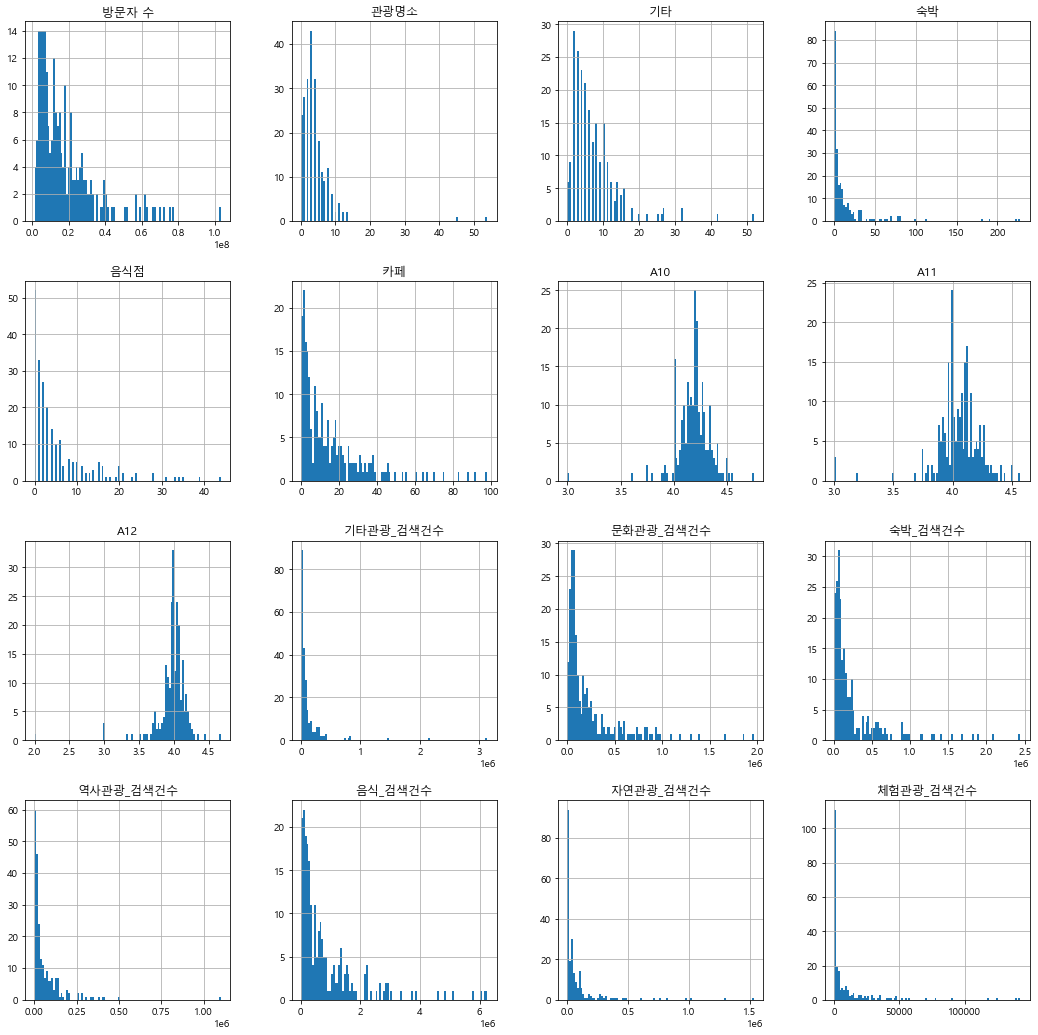

In [10]:
# 각각 연속형변수에 대해 분포 확인
# 방문자수, 관광명소, 기타, 숙박, 음식점, 카페는 왼쪽으로 치우쳐진 분포의 형태를 띄고 있음
# -> 따라서 해당 변수에대한 정규화 필요해보임
df3.hist(bins=100, figsize=(18,18))
plt.show()